In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import urllib.request, urllib.parse, urllib.error

In [1]:
url = "https://data.enedis.fr/explore/dataset/consommation-electrique-par-secteur-dactivite-commune/download/?format=csv&refine.annee=2016&timezone=Europe/Berlin&use_labels_for_header=true"
file_name ="consommation-electrique-par-secteur-dactivite-commune_2016.csv"

print("downloading with urllib, first file")
urllib.request.urlretrieve(url, file_name)

local_filename, headers = urllib.request.urlretrieve(url)
html = open(local_filename)
print("Done !\n")

url2 = "https://data.enedis.fr/explore/dataset/consommation-electrique-par-secteur-dactivite-commune/download/?format=csv&timezone=Europe/Berlin&use_labels_for_header=true"
file_name2 ="consommation-electrique-par-secteur-dactivite-commune_all.csv"

print("downloading with urllib second file")
urllib.request.urlretrieve(url2, file_name2)

local_filename2, headers2 = urllib.request.urlretrieve(url2)
html = open(local_filename2)
print("Done !\n")



downloading with urllib, first file
Done !

downloading with urllib second file
Done !



In [84]:
df =pd.read_csv("consommation-electrique-par-secteur-dactivite-commune_2016.csv", sep=";", encoding = 'utf8', low_memory=False)
df2 =pd.read_csv("consommation-electrique-par-secteur-dactivite-commune_all.csv", sep=";", encoding = 'utf8', low_memory=False)

In [85]:
df.dtypes

Année                                       int64
Nom commune                                object
Code commune                                int64
Nom EPCI                                   object
Code EPCI                                  object
Type EPCI                                  object
Nom département                            object
Code département                            int64
Nom région                                 object
Code région                                 int64
Nb sites Résidentiel                      float64
Conso totale Résidentiel (MWh)            float64
Conso moyenne Résidentiel (MWh)           float64
Nb sites Professionnel                    float64
Conso totale Professionnel (MWh)          float64
Conso moyenne Professionnel (MWh)         float64
Nb sites Agriculture                        int64
Conso totale Agriculture (MWh)            float64
Nb sites Industrie                          int64
Conso totale Industrie (MWh)              float64


In [86]:
df[df['Nb sites Industrie']<df['Nb sites Industrie'].mean()]

,Année,Nom commune,Code commune,Nom EPCI,Code EPCI,Type EPCI,Nom département,Code département,Nom région,Code région,...,Résidences principales avant 1919,Résidences principales de 1919 à 1945,Résidences principales de 1946 à 1970,Résidences principales de 1971 à 1990,Résidences principales de 1991 à 2005,Résidences principales de 2006 à 2010,Résidences principales après 2011,Taux de chauffage électrique,Geo Shape,Geo Point 2D
0,2016,Seyre,31546,CC Coteaux du Lauragais Sud (Co.Laur.Sud),243100179,CC,Haute-Garonne,31,Occitanie,76,...,23.404272,2.127638,12.766082,17.021358,14.893720,6.382914,2.340402e+01,34.042461,"{""type"": ""Polygon"", ""coordinates"": [[[1.678708...","43.3635974739, 1.66366858427"
1,2016,Étreval,54185,CC du Pays du Saintois,200035772,CC,Meurthe-et-Moselle,54,Grand-Est,44,...,57.692423,11.538634,3.846211,11.538634,7.692423,7.692423,0.000000e+00,11.538634,"{""type"": ""Polygon"", ""coordinates"": [[[6.067205...","48.4566428205, 6.05278055195"
2,2016,Gensac-de-Boulogne,31218,CC du Boulonnais,200023554,CC,Haute-Garonne,31,Occitanie,76,...,55.769231,7.692308,7.692308,11.538462,13.461538,3.846154,0.000000e+00,7.692308,"{""type"": ""Polygon"", ""coordinates"": [[[0.614595...","43.2594000005, 0.603518588147"
3,2016,Senlisse,78590,CC de la Haute Vallée de Chevreuse,200033173,CC,Yvelines,78,Île-de-France,11,...,36.073052,10.502299,16.894977,19.178076,9.589060,4.109578,3.652958e+00,28.767135,"{""type"": ""Polygon"", ""coordinates"": [[[2.000770...","48.6854168939, 1.97129695793"
5,2016,Neuville,63252,CC de Billom - Saint-Dier / Vallée du Jauron,200035020,CC,Puy-de-Dôme,63,Auvergne-Rhône-Alpes,84,...,23.456819,11.111111,9.259248,23.456819,20.370360,6.790120,5.555523e+00,19.753094,"{""type"": ""Polygon"", ""coordinates"": [[[3.418782...","45.7509734699, 3.44263147345"
6,2016,Lac-des-Rouges-Truites,39271,CC la Grandvallière,243900610,CC,Jura,39,Bourgogne-Franche-Comté,27,...,37.254891,5.882368,7.843115,24.182991,17.647040,5.882368,1.307228e+00,5.228785,"{""type"": ""Polygon"", ""coordinates"": [[[5.970894...","46.6006934031, 6.01009673333"
7,2016,Beauvais-sur-Tescou,81024,CC Vère-Grésigne - Pays Salvagnacois,200041291,CC,Tarn,81,Occitanie,76,...,41.463448,5.691034,5.691034,8.943065,21.951264,16.260153,0.000000e+00,28.455326,"{""type"": ""Polygon"", ""coordinates"": [[[1.555622...","43.8973082352, 1.57128009793"
9,2016,La Sommette,25550,CC du Pays de Pierrefontaine - Vercel,242504181,CC,Doubs,25,Bourgogne-Franche-Comté,27,...,20.000049,14.117631,5.882295,17.647008,17.647008,11.764713,1.294130e+01,10.588254,"{""type"": ""Polygon"", ""coordinates"": [[[6.488972...","47.1921800984, 6.50941467391"
10,2016,Chailly-en-Gâtinais,45066,CC du Canton de Lorris,244500278,CC,Loiret,45,Centre-Val de Loire,24,...,19.063528,5.351169,9.699008,49.163881,12.374575,3.010022,1.337817e+00,29.096990,"{""type"": ""Polygon"", ""coordinates"": [[[2.541754...","47.9368322891, 2.52791430865"
11,2016,Sardent,23168,CC du Pays Creuse - Thaurion - Gartempe,242300101,CC,Creuse,23,Nouvelle Aquitaine,75,...,39.200002,13.866663,16.000006,16.266678,6.933345,4.533331,3.199974e+00,11.466676,"{""type"": ""Polygon"", ""coordinates"": [[[1.799260...","46.0457628562, 1.85888779343"


In [45]:
distinct_commune = df['Nom commune'].unique()
NB_distinct_commune = len(distinct_commune)
NB_distinct_commune

30921

In [46]:
distinct_département = df['Nom département'].unique()
NB_distinct_département = len(distinct_département)
NB_distinct_département

94

In [47]:
distinct_region = df['Nom région'].unique()
NB_distinct_region = len(distinct_region)
NB_distinct_region

12

In [48]:
df_resi = df[['Nb sites Résidentiel','Nom région','Conso totale Résidentiel (MWh)','Conso moyenne Résidentiel (MWh)']]

In [49]:
df_resi_sum = df_resi.groupby(['Nom région']).sum()

In [50]:
df_resi_sum

,Nb sites Résidentiel,Conso totale Résidentiel (MWh),Conso moyenne Résidentiel (MWh)
Nom région,,,
Auvergne-Rhône-Alpes,2400704.0,1.291921e+07,21116.325878
Bourgogne-Franche-Comté,945481.0,5.100517e+06,16560.138015
Bretagne,1169080.0,6.079378e+06,6794.832683
Centre-Val de Loire,782084.0,5.025665e+06,10394.352455
Grand-Est,1176818.0,6.654068e+06,22379.334663
Hauts-de-France,1277284.0,7.042180e+06,17230.909397
Normandie,971912.0,6.103786e+06,16724.734023
Nouvelle Aquitaine,1896461.0,1.060193e+07,21501.658350
Occitanie,1632525.0,8.895204e+06,20328.632582


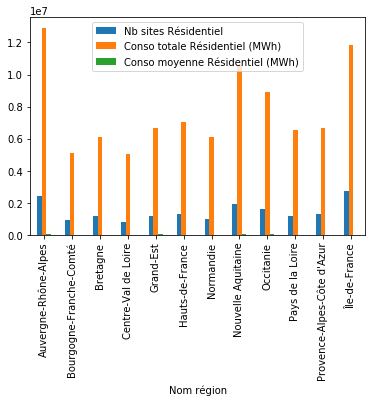

In [51]:
df_resi_sum.plot.bar()
plot.show()

In [52]:
df_conso = df[['Conso totale Industrie (MWh)','Nom région','Conso totale Résidentiel (MWh)','Conso totale Professionnel (MWh)','Conso totale Tertiaire (MWh)']]

In [53]:
df_conso_sum = df_conso.groupby(['Nom région']).sum()

In [54]:
df_conso_sum

,Conso totale Industrie (MWh),Conso totale Résidentiel (MWh),Conso totale Professionnel (MWh),Conso totale Tertiaire (MWh)
Nom région,,,,
Auvergne-Rhône-Alpes,1.034118e+07,1.291921e+07,3.293859e+06,1.156847e+07
Bourgogne-Franche-Comté,4.015697e+06,5.100517e+06,1.277748e+06,3.594888e+06
Bretagne,4.168411e+06,6.079378e+06,1.685536e+06,4.340179e+06
Centre-Val de Loire,3.015246e+06,5.025665e+06,1.001539e+06,3.267889e+06
Grand-Est,6.392799e+06,6.654068e+06,1.580256e+06,4.917434e+06
Hauts-de-France,7.268205e+06,7.042180e+06,1.609612e+06,7.278560e+06
Normandie,4.707160e+06,6.103786e+06,1.350920e+06,4.418963e+06
Nouvelle Aquitaine,4.662306e+06,1.060193e+07,2.430190e+06,7.584084e+06
Occitanie,3.519432e+06,8.895204e+06,2.059659e+06,7.668588e+06


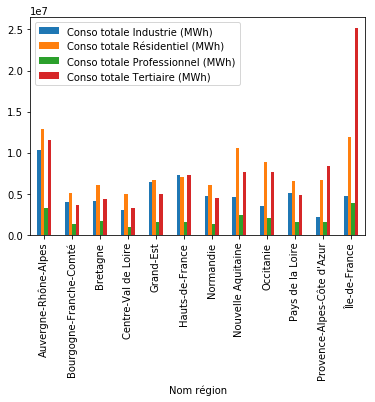

In [62]:
df_conso_sum.plot.bar()
plot.show()

Entrez une région Occitanie
Occitanie


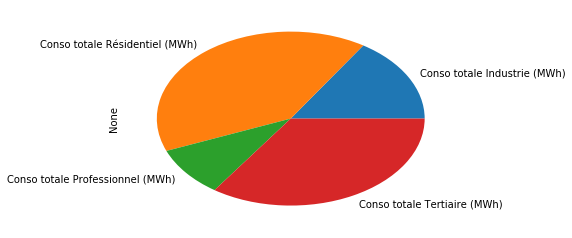

In [64]:
input_region = input("Entrez une région ")
print(input_region)

df_info_region = df[['Conso totale Industrie (MWh)','Conso totale Résidentiel (MWh)','Conso totale Professionnel (MWh)','Conso totale Tertiaire (MWh)']]
df_info_region[df['Nom région']==input_region].sum().plot.pie()
plot.show()

In [65]:
df_resi2 = df2[['Année','Nb sites Résidentiel','Conso totale Résidentiel (MWh)','Conso moyenne Résidentiel (MWh)']]
df_resi2[df2['Nom région']==input_region].groupby(['Année']).sum()

,Nb sites Résidentiel,Conso totale Résidentiel (MWh),Conso moyenne Résidentiel (MWh)
Année,,,
2011,2504160.0,1.232805e+07,20302.592091
2012,2498585.0,1.305104e+07,21635.539945
2013,2472396.0,1.326882e+07,22194.366051
2014,2412615.0,1.172060e+07,20057.186937
2015,2354926.0,1.169218e+07,20361.087731
2016,1632525.0,8.895204e+06,20328.632582


In [66]:
df_indu2 = df2[['Année','Nb sites Industrie','Conso totale Industrie (MWh)']]
df_indu2[df2['Nom région']==input_region].groupby(['Année']).sum()

,Nb sites Industrie,Conso totale Industrie (MWh)
Année,,
2011,7218,3.426857e+06
2012,7640,3.464145e+06
2013,8061,3.498539e+06
2014,8142,3.431303e+06
2015,8201,3.508525e+06
2016,8522,3.519432e+06


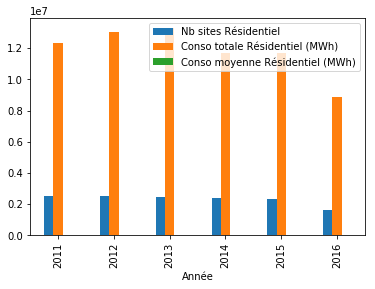

In [70]:
df_resi2[df2['Nom région']==input_region].groupby(['Année']).sum().plot.bar()
plot.show()

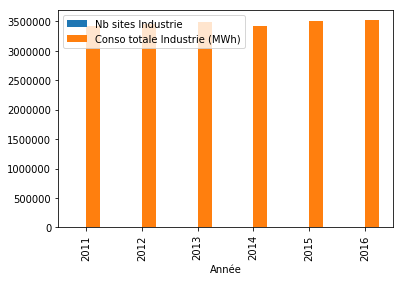

In [72]:
df_indu2[df2['Nom région']==input_region].groupby(['Année']).sum().plot.bar()
plot.show()

In [73]:
df_departement = df[['Nom région','Nom département','Conso totale Industrie (MWh)','Conso totale Résidentiel (MWh)','Conso totale Professionnel (MWh)','Conso totale Tertiaire (MWh)']]
df_departement[df_departement['Nom région']== input_region].groupby(['Nom département']).sum()

,Conso totale Industrie (MWh),Conso totale Résidentiel (MWh),Conso totale Professionnel (MWh),Conso totale Tertiaire (MWh)
Nom département,,,,
Ariège,92383.365329,2.981038e+05,71773.445714,1.387330e+05
Aude,209481.772053,6.925634e+05,135715.102323,4.368093e+05
Aveyron,329834.003318,6.655762e+05,285123.701683,3.054178e+05
Gard,440266.909675,1.296192e+06,236929.212177,8.087845e+05
Gers,146392.641979,4.315810e+05,130942.189151,2.197205e+05
Haute-Garonne,784227.135579,1.447008e+06,271806.170474,2.114604e+06
Hautes-Pyrénées,136869.230676,4.162892e+05,119171.704541,3.202992e+05
Hérault,335155.706997,1.021732e+06,190259.665900,1.622512e+06
Lot,206288.935167,5.250150e+05,136728.804736,1.898739e+05


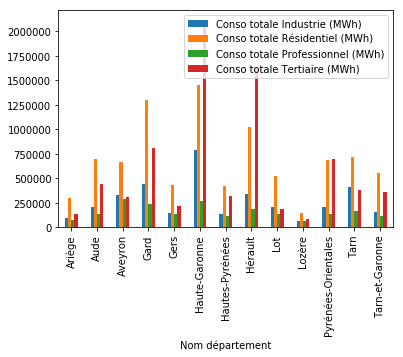

In [76]:
df_departement[df_departement['Nom région']== input_region].groupby(['Nom département']).sum().plot.bar()
plot.show()

In [103]:
input_departement = input("Entrez un departement ")
print(input_departement)

df_ville = df[['Code commune','Nom département','Nom commune','Conso totale Industrie (MWh)','Conso totale Résidentiel (MWh)','Conso totale Professionnel (MWh)','Conso totale Tertiaire (MWh)']]
df_ville_sum = df_ville[df_ville['Nom département']== input_departement].groupby(['Nom commune', 'Nom département', 'Code commune']).sum()
df_ville_sum

Entrez un departement Lot
Lot


,,,Conso totale Industrie (MWh),Conso totale Résidentiel (MWh),Conso totale Professionnel (MWh),Conso totale Tertiaire (MWh)
Nom commune,Nom département,Code commune,,,,
Albas,Lot,46001,75.825525,1996.157367,280.335992,100.147201
Albiac,Lot,46002,0.000000,202.180355,263.261499,0.000000
Alvignac,Lot,46003,231.410084,2347.322870,866.342385,1194.653085
Anglars,Lot,46004,0.000000,713.127933,140.840675,111.279841
Anglars-Juillac,Lot,46005,88.572371,1156.879670,129.648252,201.826698
Anglars-Nozac,Lot,46006,0.000000,1290.710686,233.160609,9.527890
Arcambal,Lot,46007,4.442789,3048.042611,369.751032,928.657737
Assier,Lot,46009,0.000000,1711.648992,619.817676,313.396842
Aujols,Lot,46010,260.117333,1294.312221,66.215360,0.000000


In [104]:
df_ville_sum[df_ville_sum['Conso totale Industrie (MWh)']<df['Conso totale Industrie (MWh)'].mean()]

,,,Conso totale Industrie (MWh),Conso totale Résidentiel (MWh),Conso totale Professionnel (MWh),Conso totale Tertiaire (MWh)
Nom commune,Nom département,Code commune,,,,
Albas,Lot,46001,75.825525,1996.157367,280.335992,100.147201
Albiac,Lot,46002,0.000000,202.180355,263.261499,0.000000
Alvignac,Lot,46003,231.410084,2347.322870,866.342385,1194.653085
Anglars,Lot,46004,0.000000,713.127933,140.840675,111.279841
Anglars-Juillac,Lot,46005,88.572371,1156.879670,129.648252,201.826698
Anglars-Nozac,Lot,46006,0.000000,1290.710686,233.160609,9.527890
Arcambal,Lot,46007,4.442789,3048.042611,369.751032,928.657737
Assier,Lot,46009,0.000000,1711.648992,619.817676,313.396842
Aujols,Lot,46010,260.117333,1294.312221,66.215360,0.000000


In [144]:
df_ville

,Code commune,Nom département,Nom commune,Conso totale Industrie (MWh),Conso totale Résidentiel (MWh),Conso totale Professionnel (MWh),Conso totale Tertiaire (MWh)
0,31546,Haute-Garonne,Seyre,0.000000,438.788782,22.572683,0.000000
1,54185,Meurthe-et-Moselle,Étreval,0.000000,NaN,NaN,0.000000
2,31218,Haute-Garonne,Gensac-de-Boulogne,0.000000,297.468823,67.582440,0.000000
3,78590,Yvelines,Senlisse,0.000000,2319.575563,312.061262,107.949282
4,43114,Haute-Loire,Lapte,217.358794,4383.821291,1007.124399,3760.946305
5,63252,Puy-de-Dôme,Neuville,0.000000,1319.174713,198.072080,313.733988
6,39271,Jura,Lac-des-Rouges-Truites,107.066011,999.238960,256.219451,143.970392
7,81024,Tarn,Beauvais-sur-Tescou,263.413063,1138.465933,223.103269,0.000000
8,38537,Isère,La Verpillière,33116.647990,NaN,NaN,9486.225927
9,25550,Doubs,La Sommette,0.000000,564.193471,315.354534,0.000000


In [188]:
#df_ville_sum['Conso totale Industrie (MWh)']
#list(df_ville_sum)

#listVille=[]
#listCode=[]

dfcols = ['Code commune', 'Nom département', 'Nom commune', 'Conso totale Industrie (MWh)', 'Conso totale Résidentiel (MWh)', 'Conso totale Professionnel (MWh)', 'Conso totale Tertiaire (MWh)', 'rss']
df_new = pd.DataFrame(columns=dfcols)   

        
i=0
for y in range(len(df_ville)):
    for x in range(len(allheadlines)):
        if(str(df_ville['Code commune'][y]) in allheadlines[x]):
            #print(allheadlines[x], str(df_ville['Code commune'][y]))
            #print(df_ville['Code commune'][y])
            df_new = df_new.append(pd.Series([0,0,0,0,0,0,0,0], index=dfcols), ignore_index=True)
            
            #listVille.append(allheadlines[x])
            #listCode.append(df_ville['Code commune'][y])
            
            
            #df_plot.ix[0,value] += 1
            df_new.ix[i,'Code commune']=df_ville['Code commune'][y]
            df_new['Nom département'][i]=df_ville['Nom département'][y]
            df_new['Nom commune'][i]=df_ville['Nom commune'][y]
            df_new['Conso totale Industrie (MWh)'][i]=df_ville['Conso totale Industrie (MWh)'][y]
            df_new['Conso totale Résidentiel (MWh)'][i]=df_ville['Conso totale Résidentiel (MWh)'][y]
            df_new['Conso totale Professionnel (MWh)'][i]=df_ville['Conso totale Professionnel (MWh)'][y]
            df_new['Conso totale Tertiaire (MWh)'][i]=df_ville['Conso totale Tertiaire (MWh)'][y]
            df_new['rss'][i]=allheadlines[x]
            
            
            i=i+1
        #else:
         #   listVille.append("none")

            
df_new
#df_ville['test']=listVille
#df_ville
#list(df_ville)
#print(len(listVille))
   
#dfcols = ['Code commune', 'Nom département', 'Nom commune', 'Conso totale Industrie (MWh)', 'Conso totale Résidentiel (MWh)', 'Conso totale Professionnel (MWh)', 'Conso totale Tertiaire (MWh)', 'rss']
#df_new = pd.DataFrame(columns=dfcols)   
#list(df_new)


#df_ville['Code commune'][0]

C:\Users\galli\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,Code commune,Nom département,Nom commune,Conso totale Industrie (MWh),Conso totale Résidentiel (MWh),Conso totale Professionnel (MWh),Conso totale Tertiaire (MWh),rss
0,31130,Haute-Garonne,Cazaril-Tambourès,0,235.422,87.13,21.1471,Flourens (31130) - Appartement 4 pièces
1,3317,Allier,Viplaix,0.00962078,1292.26,244.447,136.086,"Gradignan (33170) - Appartement 1 pièce, 27 m²"
2,3317,Allier,Viplaix,0.00962078,1292.26,244.447,136.086,"Gradignan (33170) - Appartement 1 pièce, 27 m²"
3,33500,Gironde,Samonac,49.8786,1485.93,243.148,0,"Libourne (33500) - Appartement 2 pièces, 57 m²"
4,3100,Allier,Diou,2915.74,4024.15,605.59,172.201,Toulouse (31000) - Appartement 2 pièces
5,3100,Allier,Diou,2915.74,4024.15,605.59,172.201,"Toulouse (31000) - Appartement 4 pièces, 146 m²"
6,3100,Allier,Diou,2915.74,4024.15,605.59,172.201,Toulouse (31000) - Appartement 3 pièces
7,3100,Allier,Diou,2915.74,4024.15,605.59,172.201,Toulouse (31000) - Appartement 2 pièces
8,33400,Gironde,Saint-Ferme,830.044,1135.85,222.519,44.1158,Talence (33400) - Appartement 1 pièce
9,33400,Gironde,Saint-Ferme,830.044,1135.85,222.519,44.1158,"Talence (33400) - Appartement 1 pièce, 32 m²"


In [176]:
print(listVille)

['Flourens (31130) - Appartement 4 pièces', 'Gradignan (33170) - Appartement 1 pièce, 27 m²', 'Gradignan (33170) - Appartement 1 pièce, 27 m²', 'Libourne (33500) - Appartement 2 pièces, 57 m²', 'Toulouse (31000) - Appartement 2 pièces', 'Toulouse (31000) - Appartement 4 pièces, 146 m²', 'Toulouse (31000) - Appartement 3 pièces', 'Toulouse (31000) - Appartement 2 pièces', 'Talence (33400) - Appartement 1 pièce', 'Talence (33400) - Appartement 1 pièce, 32 m²', 'Talence (33400) - Appartement 3 pièces, 70 m²', 'Gradignan (33170) - Appartement 1 pièce, 27 m²', 'Gradignan (33170) - Appartement 1 pièce, 27 m²', 'Villeurbanne (69100) - Appartement 1 pièce', 'Villeurbanne (69100) - Appartement 1 pièce, 30 m²', 'Villeurbanne (69100) - Appartement 1 pièce, 22 m²', 'Villeurbanne (69100) - Appartement 1 pièce', 'Villeurbanne (69100) - Appartement 1 pièce, 30 m²', 'Villeurbanne (69100) - Appartement 1 pièce, 22 m²', 'Saint-Sulpice-et-Cameyrac (33450) - Appartement 2 pièces, 35 m²', 'Saint-Sulpice-et

In [185]:
df_new
    

,Code commune,Nom département,Nom commune,Conso totale Industrie (MWh),Conso totale Résidentiel (MWh),Conso totale Professionnel (MWh),Conso totale Tertiaire (MWh),rss
0,31130,Haute-Garonne,Cazaril-Tambourès,0,235.422,87.13,21.1471,Flourens (31130) - Appartement 4 pièces
1,3317,Allier,Viplaix,0.00962078,1292.26,244.447,136.086,"Gradignan (33170) - Appartement 1 pièce, 27 m²"
2,3317,Allier,Viplaix,0.00962078,1292.26,244.447,136.086,"Gradignan (33170) - Appartement 1 pièce, 27 m²"
3,33500,Gironde,Samonac,49.8786,1485.93,243.148,0,"Libourne (33500) - Appartement 2 pièces, 57 m²"
4,3100,Allier,Diou,2915.74,4024.15,605.59,172.201,Toulouse (31000) - Appartement 2 pièces
5,3100,Allier,Diou,2915.74,4024.15,605.59,172.201,"Toulouse (31000) - Appartement 4 pièces, 146 m²"
6,3100,Allier,Diou,2915.74,4024.15,605.59,172.201,Toulouse (31000) - Appartement 3 pièces
7,3100,Allier,Diou,2915.74,4024.15,605.59,172.201,Toulouse (31000) - Appartement 2 pièces
8,33400,Gironde,Saint-Ferme,830.044,1135.85,222.519,44.1158,Talence (33400) - Appartement 1 pièce
9,33400,Gironde,Saint-Ferme,830.044,1135.85,222.519,44.1158,"Talence (33400) - Appartement 1 pièce, 32 m²"


In [81]:
city_code = input("Entrez ")
print(city_code)

Entrez 84000
84000


In [159]:
import feedparser

def RSS_parse(link_rss):
    return feedparser.parse(link_rss) 
    
def get_headlines(link_rss):
    headlines = []
    rss_feed = RSS_parse(link_rss)
    for newsitem in rss_feed['items']:
        headlines.append(newsitem['title'])
    return headlines

def find_between_r( s, first, last ):
    try:
        start = s.rindex( first ) + len( first )
        end = s.rindex( last, start )
        return s[start:end]
    except ValueError:
        return ""

allheadlines = []
 
newsurls = { 'rssImmo':'https://www.paruvendu.fr/pa/rss/default/rssImmo'}
 
for key,url in newsurls.items():
    allheadlines.extend( get_headlines( url ) )

for x in range(len(allheadlines)):
    if(str(city_code) in allheadlines[x]):
        print(allheadlines[x])
else :
    print('no house for this in the flux righ now')

no house for this in the flux righ now


In [23]:
print("Fin présentation")

Fin présentation


In [160]:
 allheadlines

['Flourens (31130) - Appartement 4 pièces',
 'Toulouse (31000) - Appartement 2 pièces',
 'Toulouse (31000) - Appartement 4 pièces, 146 m²',
 'Toulouse (31000) - Appartement 3 pièces',
 'Miramont-de-Guyenne (47800) - Maison 5 pièces',
 'Toulouse (31000) - Appartement 2 pièces',
 'Le Cannet (06110) - Appartement 3 pièces, 53 m²',
 'Lyon 7 - Appartement 1 pièce',
 'Lyon 7 - Appartement 1 pièce, 24 m²',
 'Lyon 2 - Appartement 1 pièce',
 'Villeurbanne (69100) - Appartement 1 pièce',
 'Villeurbanne (69100) - Appartement 1 pièce, 30 m²',
 'Lyon 7 - Appartement 1 pièce',
 'Lyon 3 - Appartement 1 pièce, 28 m²',
 'Lyon 3 - Appartement 1 pièce',
 'Villeurbanne (69100) - Appartement 1 pièce, 22 m²',
 'Lyon 3 - Appartement 3 pièces, 67 m²',
 'Lyon 3 - Appartement 1 pièce, 25 m²',
 'Mérignac (33700) - Appartement 2 pièces, 40 m²',
 'Bordeaux (33000) - Appartement 1 pièce',
 'Bordeaux (33000) - Appartement 1 pièce, 27 m²',
 'Bordeaux (33000) - Appartement 1 pièce, 18 m²',
 'Talence (33400) - Appartem

In [32]:
print('Grand-Est, Marne, Reims, 51100')

Grand-Est, Marne, Reims, 51100
